In [13]:
import gmpy2 
import math
from random import randint
from math import gcd
import numpy as np
import libnum
import cv2
from PIL import Image
rs = gmpy2.random_state()

In [303]:
class Paillier(object):
    
 
    def __init__(self):
        
        self.publicKey = None
        self.privateKey = None
        
    def lcm(self, x, y):
        
        return x * y // gcd(x, y) 
    
    def sTn(self,m):
        arr = bytes(m, 'utf-8')
        m = int.from_bytes(arr, 'big')
        return m
          
     
    def getP(self):
        
        p = gmpy2.mpz_urandomb(rs, 1024)
        while not gmpy2.is_prime(p):
            p = p + 1
        return p
    
    def getKeys(self):
     
        #p = self.getP()
        #q = self.getP()
        
        p = 23
        q = 19
        
        n = p * q
        lamda = self.lcm(p-1, q-1)
        
        
        g = n + 1
        mu = (pow(g,lamda,n*n)-1) // n
        mu = libnum.invmod(mu, n)
        
        #mu = gmpy2.invert(lamda, n)
        
        self.publicKey = [n, g]
        self.privateKey = [lamda, mu]
    
    def encrypt(self, m):
        
        if isinstance(m, str):
            m = self.sTn(m)
        
        #print(m)
        
        n,g = self.publicKey
        r = randint(0,n)
        while gcd(n, r)!= 1:
            r = r + 1
        
        c = (pow(g, m, n*n) * pow(r, n, n*n)) % (n*n)
        
        # print(c)
        return c
    
    def decrypt(self,c):
        
        n, g = self.publicKey
        lamda, mu = self.privateKey
        
        c = (pow(c,lamda, n*n) - 1) // n * mu
        c = c % n
        c = int (c)
        # print(c)
        m = c
        #m = libnum.n2s(c)
        #m = m.decode("utf-8") 
        return m


    
if __name__ == "__main__":    
    string = 'CWRo get ae.'
    byte = ''
    text = 255 #byte
    
    p = Paillier()
    p.getKeys()
    
    
    c = p.encrypt(text) 
    m = p.decrypt(c)
    
    print("Plaintext:", text)
    print("Ciphertext:", c)
    print("Deciphertext: ", m)
    
        


Plaintext: 255
Ciphertext: 15158
Deciphertext:  255


In [212]:
18 * 22 // gcd(18, 22)

198

In [304]:
p = Paillier()
p.getKeys()

In [344]:
text = 255
c = p.encrypt(text) 
m = p.decrypt(c)
print("Ciphertext:", c)
print("Deciphertext: ", m)

Ciphertext: 56169
Deciphertext:  255


In [305]:
import cv2

img = cv2.imread('sin.png', 0)



In [346]:
p = Paillier()
p.getKeys()

data_encrypted = [[p.encrypt(int(x)) for x in row] for row in img]

data_encrypted

[[75552,
  42683,
  57254,
  40828,
  152239,
  83748,
  169918,
  115609,
  75538,
  113319,
  54907,
  130829,
  64704,
  9273,
  146655,
  136373,
  24435,
  79335,
  113750,
  97978,
  26208,
  177106,
  102198,
  60652,
  187083,
  92688,
  9421,
  44619,
  115417,
  101553,
  111273,
  126265,
  91230,
  35626,
  156065,
  70901,
  120429,
  126024,
  61122,
  18861,
  79894,
  129091,
  159116,
  110319,
  154034,
  68140,
  101914,
  183276,
  16494,
  146350,
  182089,
  70644,
  66820,
  190033,
  71581,
  75538,
  172108,
  141365,
  83748,
  32964,
  24762,
  33428,
  147072,
  184743,
  177398,
  89279,
  157000,
  14797,
  129496,
  38712,
  113105,
  77343,
  53316,
  91230,
  35626,
  92688,
  133213,
  134020,
  98107,
  70791,
  83748,
  159116,
  126024,
  2131,
  50897,
  64945,
  77343,
  49560,
  13571,
  8880,
  59349,
  96391,
  154034,
  123908,
  103518,
  113319,
  173754,
  61459,
  96391,
  129496,
  9421,
  100082,
  88592,
  115417,
  34904,
  70791,
  14

In [347]:
data_decrypted = [[p.decrypt(x) for x in row] for row in data_encrypted]

In [349]:
array = np.array(data_decrypted, dtype=np.uint8)
array 

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

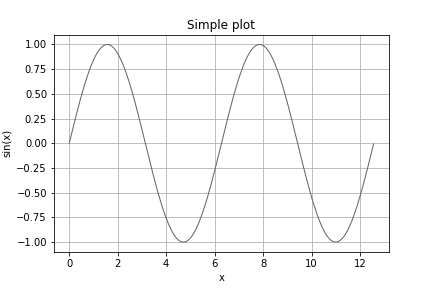

In [350]:
image1 = Image.fromarray(img)
image1

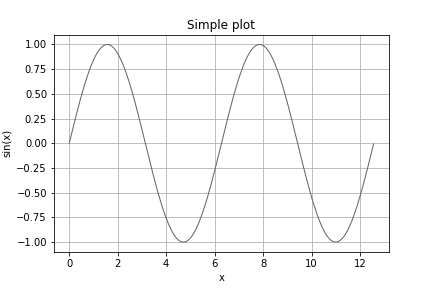

In [351]:
image2 = Image.fromarray(array)
image2